# File Overview

This file analyses the binary classifiers that were generated by the 5_country_classifier.ipynb notebook

# Outputs / Assets
* proportion of nopes bar chart
* top classifier by TPR, PPV, and ACC

In [2]:
pickle_file = 'full_country_row_sample_rate_1_country_min_sample_cutoff_1200_cutoffs_5000-2500-1000-500-250-100_results.pkl'

In [2]:
import numpy as np
import pandas as pd
import time
import pickle
import matplotlib.pyplot as plt

pd.options.display.max_rows = 2000
pd.options.display.max_columns = 1000
pd.options.display.max_colwidth = 255

In [3]:
with open('./pickles/%s' % pickle_file, 'rb') as f:
    results_df = pickle.load(f)    

In [4]:
def choose_largest_coefficient_name (coefficients):
    if coefficients is None:
        return None
    return coefficients.sort_values(by='abs_weight', ascending=False)['X_Column'].iloc[0]

def choose_largest_coefficient_weight (coefficients):    
    if coefficients is None:
        return None
    return coefficients.sort_values(by='abs_weight', ascending=False)['abs_weight'].iloc[0]
    
    
results_df['largest_coefficient_column'] = results_df['coefficients'].apply(choose_largest_coefficient_name)
results_df['largest_coefficient_weight'] = results_df['coefficients'].apply(choose_largest_coefficient_weight)

In [5]:
def generate_country_aggregates (runs_for_country):
    total_sims = runs_for_country.shape[0]
    nopes =  runs_for_country.query('TP == 0 and FP == 0').shape[0]
    proportion_of_nopes = round(nopes / total_sims, 3)
    country_proportion = round(runs_for_country.iloc[0]['P'] / (runs_for_country.iloc[0]['P'] + runs_for_country.iloc[0]['N']),3)

    result = pd.Series({
        'total_sims' : total_sims,
        'country_proportion': country_proportion,
        'nopes' : nopes,
        'proportion_of_nopes' : proportion_of_nopes,
    })
    
    return result
    
country_aggregates = results_df \
    .reset_index() \
    .drop(columns=['coefficients', 'X_columns']) \
    .groupby('country') \
    .apply(generate_country_aggregates)

country_aggregates

,total_sims,country_proportion,nopes,proportion_of_nopes
country,,,,
Australia,18.0,0.019,13.0,0.722
Brazil,18.0,0.027,15.0,0.833
Canada,18.0,0.035,14.0,0.778
France,18.0,0.029,16.0,0.889
Germany,18.0,0.059,13.0,0.722
India,18.0,0.134,0.0,0.000
Netherlands,18.0,0.020,15.0,0.833
Poland,18.0,0.020,15.0,0.833
United Kingdom,18.0,0.059,15.0,0.833


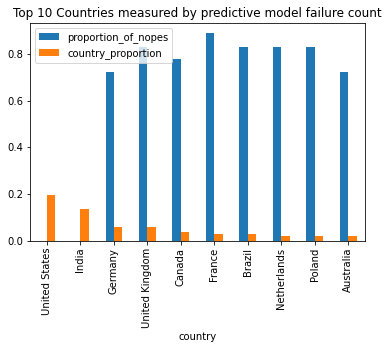

In [15]:
(country_aggregates[['proportion_of_nopes', 'country_proportion']]).sort_values(by='country_proportion', ascending=False).plot(kind="bar");
plt.title("Top 10 Countries measured by predictive model failure count");

In [9]:
non_useless_classifiers = results_df \
    .query('TP > 0 or FP > 0') \
    .drop(columns=['X_columns', 'coefficients'])

In [10]:
print("model count %s" % results_df.shape[0])
print("non useless classifiers (i.e., P > 0): %s" % results_df.query('TP > 0 or FP > 0').shape[0])

model count 180
non useless classifiers (i.e., P > 0): 64


In [11]:
non_useless_classifiers.sort_values(by='TPR', ascending=False) \
    .rename(columns = {}) \
    [['model_type', 'column_count', 'P', 'N', 'TPR', 'TNR', 'PPV', 'NPV', 'ACC']] \
    .head(1)

,,model_type,column_count,P,N,TPR,TNR,PPV,NPV,ACC
country,cutoff,,,,,,,,,
United States,500,linear_svm,433,3747,15592,0.971,0.229,0.232,0.97,0.372


In [12]:
non_useless_classifiers.sort_values(by='PPV', ascending=False).head(10) \
    .rename(columns = {}) \
    [['model_type', 'column_count', 'P', 'N', 'TPR', 'TNR', 'PPV', 'NPV', 'ACC']] \
    .head(1)

,,model_type,column_count,P,N,TPR,TNR,PPV,NPV,ACC
country,cutoff,,,,,,,,,
India,500,random_forest,433,2585,16754,0.007,1.0,0.944,0.867,0.867


In [13]:
non_useless_classifiers.sort_values(by='ACC', ascending=False).head(10) \
    .rename(columns = {}) \
    [['model_type', 'column_count', 'P', 'N', 'TPR', 'TNR', 'PPV', 'NPV', 'ACC']] \
    .head(1)

,,model_type,column_count,P,N,TPR,TNR,PPV,NPV,ACC
country,cutoff,,,,,,,,,
Australia,100,linear_svm,441,358,18981,0.0,1.0,0.0,0.981,0.981
